PROJECT BRIEF

Crime in Chicago has been worrisome to the Chicago PD. Reported crimes have been tracked on a daily basis since 2001 and have been provided in the project data file. The Chicago PD would like to drastically reduce the spate of violent crimes reported in the city. Being effective involves knowing crime patterns and where they are likely to occur. It also involves equipping the Police Department appropriately. They have recruited you to conduct full data analytics and uncover insights from the data that can be used to effectively prepare for and respond to crimes. They are interested in gleaning any insights that can help them determine What type of crimes to prepare for, Where these crimes are most likely to occur, What days of the week and periods to expect these crimes

In [11]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from pandas import set_option
from datetime import datetime
from IPython.display import IFrame
%matplotlib inline

In [12]:
#loading data and displaying all the columns
crime_data = pd.read_csv('C:\\Users\\HP\\Documents\\WORKSPACE\\crime_data_Proj1.csv')
pd.set_option('display.max_columns', None)

# Data Exploration

In [13]:
#exploration of features
crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [14]:
#information about the data
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

The data comprises of types such as Strings, Integers, Booleans and Floats.

In [15]:
#checking the shape of the data
crime_data.shape

(2278726, 23)

In [16]:
#checking for missing values
crime_data.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [17]:
#descritptive statistics of data
crime_data.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.278726e+06,2.278726e+06,2.278726e+06,2.278714e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06
mean,1.139362e+06,6.882068e+06,1.186442e+03,1.129072e+01,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01
std,6.578117e+05,3.419168e+06,7.026836e+02,6.946692e+00,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02
min,0.000000e+00,6.370000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,5.696812e+05,3.716076e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01
50%,1.139362e+06,6.885990e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01
75%,1.709044e+06,9.887568e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01
max,2.278725e+06,1.278199e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


In [18]:
#dropping the missing values from the features
df =crime_data.dropna( how='any',subset=['Location Description', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Latitude','Longitude', 'Location', 'Case Number' ])

In [19]:
#checking to confirm that all missing values have been dropped
df.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [20]:
#checking for percentage of data left after droping the missing values
print(round(2070581/2278725 * 100,2), "percentage of the data has been retained.")

90.87 percentage of the data has been retained.


After dropping the missing values we are left with 91% of our data which is large enough to carry out the analysis. This was the rationale that guided my thought process. I also condsidered the fact that the features with the missing values were not paramount to my analysis.

In [21]:

df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [22]:
#creating a varaible to hold the numerical features
ds = df[['Beat','District','Ward','Community Area', 'X Coordinate', 'Y Coordinate','Year','Latitude','Longitude']]

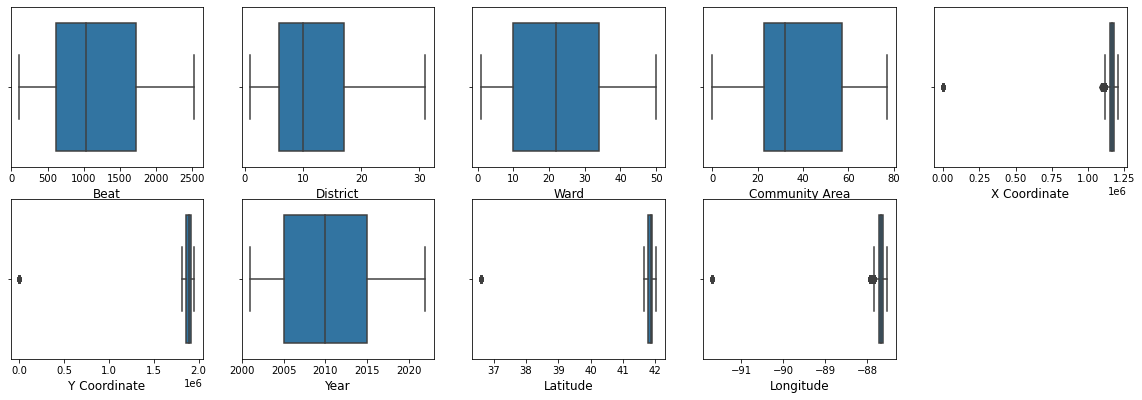

In [23]:
#checking the distribution of the numreical features in the data
plt.figure(figsize = (20, 10))
for i in range (len(ds.columns)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x = ds.iloc[:, i])
    plt.xlabel(ds.columns[i], size = 12)

# Univariate Aanalysis of the Data

In [24]:
#checking for unique types of crime
df['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT',
       'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY',
       'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE', 'THEFT',
       'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'STALKING', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT', 'HOMICIDE',
       'LIQUOR LAW VIOLATION', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT',
       'KIDNAPPING', 'ARSON', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL', 'OBSCENITY', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [25]:
#count of the top ten crimes
(df['Primary Type'].value_counts().head(10))

THEFT                  436851
BATTERY                381760
CRIMINAL DAMAGE        237244
NARCOTICS              199506
ASSAULT                135223
OTHER OFFENSE          128772
BURGLARY               114981
MOTOR VEHICLE THEFT     95269
DECEPTIVE PRACTICE      87658
ROBBERY                 78447
Name: Primary Type, dtype: int64

In [26]:
#CRIMES WITH LESS REPORTED CASES 
(df['Primary Type'].value_counts().tail(10))

STALKING                             1238
CONCEALED CARRY LICENSE VIOLATION     303
OBSCENITY                             203
PUBLIC INDECENCY                       56
NON-CRIMINAL                           44
OTHER NARCOTIC VIOLATION               29
HUMAN TRAFFICKING                      28
NON - CRIMINAL                         12
RITUALISM                               7
NON-CRIMINAL (SUBJECT SPECIFIED)        2
Name: Primary Type, dtype: int64

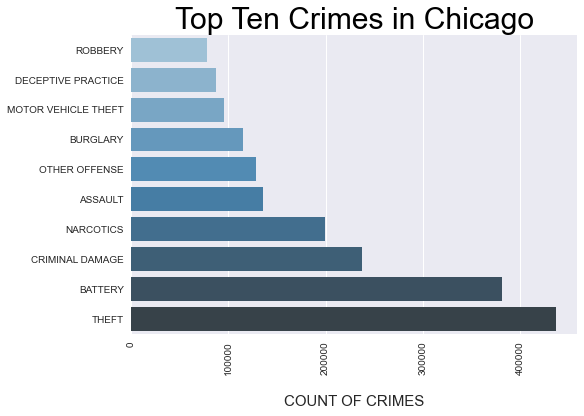

In [27]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 10 crimes
top_5_crime = df['Primary Type'].value_counts().sort_values(ascending=False)[:10]

temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head(10)
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top Ten Crimes in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

This chart shows the top "ten" most common types of crime with "THEFT" and "BATTERY" being he highest with a total case of 436,851 and 381,760 respectively

In [28]:
#checking for unique descrptions of crime
df['Description'].unique()

array(['TO VEHICLE', 'UNLAWFUL POSS AMMUNITION', 'FORCIBLE ENTRY',
       'SIMPLE', 'AGGRAVATED - HANDGUN', 'STRONGARM - NO WEAPON',
       'POSS: CANNABIS 30GMS OR LESS', 'AUTOMOBILE',
       'MANU/DELIVER: HEROIN (WHITE)', 'DOMESTIC BATTERY SIMPLE',
       'UNLAWFUL ENTRY', 'OBSCENE TELEPHONE CALLS',
       'SOLICIT ON PUBLIC WAY', 'COUNTERFEITING DOCUMENT',
       '$500 AND UNDER', 'POSS: CRACK', 'THEFT/RECOVERY: AUTOMOBILE',
       'UNLAWFUL USE HANDGUN', 'FRAUD OR CONFIDENCE GAME',
       'POCKET-PICKING', 'ILLEGAL USE CASH CARD', 'INTIMIDATION',
       'TO PROPERTY', 'FROM BUILDING', 'AGGRAVATED: OTHER DANG WEAPON',
       'RECKLESS FIREARM DISCHARGE', 'POSS: HEROIN(WHITE)', 'OVER $500',
       'AGGRAVATED: HANDGUN', 'TELEPHONE THREAT', 'ARMED: HANDGUN',
       'OBSTRUCTING JUSTICE', 'TO LAND', 'HOME INVASION',
       'AGGRAVATED:KNIFE/CUTTING INSTR', 'FINANCIAL ID THEFT:$300 &UNDER',
       'HARASSMENT BY TELEPHONE', 'POSS: COCAINE', 'RETAIL THEFT',
       'POSS: HEROIN(BRN/TAN)

In [29]:
#Count of the types of crime descriptions
(df['Description'].value_counts().head(10))

SIMPLE                          229508
DOMESTIC BATTERY SIMPLE         177932
$500 AND UNDER                  160216
TO VEHICLE                      114783
TO PROPERTY                     109282
OVER $500                       105688
FORCIBLE ENTRY                   76834
POSS: CANNABIS 30GMS OR LESS     76732
AUTOMOBILE                       76224
FROM BUILDING                    74582
Name: Description, dtype: int64

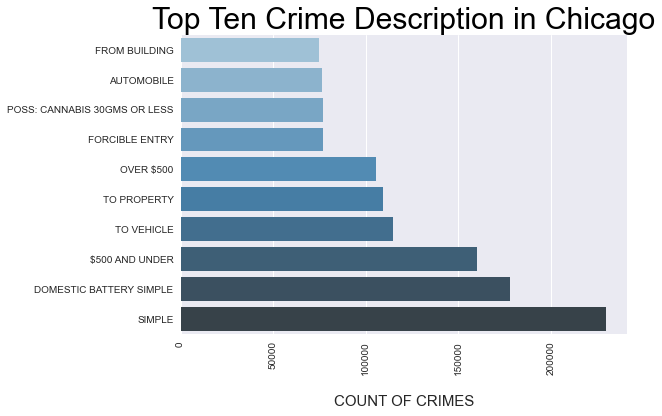

In [30]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_crime = df['Description'].value_counts().sort_values(ascending=False)[:10]

temp = df.groupby('Description', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head(10)
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Description', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top Ten Crime Description in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

simple accounted for the highest type of crime description with a total of 229,508

In [31]:
#count of top crime location description
(df['Location Description'].value_counts().head(10))

STREET                            530430
RESIDENCE                         342699
APARTMENT                         239322
SIDEWALK                          203853
OTHER                              72077
PARKING LOT/GARAGE(NON.RESID.)     54754
ALLEY                              46316
SMALL RETAIL STORE                 39603
SCHOOL, PUBLIC, BUILDING           39152
RESIDENCE-GARAGE                   36433
Name: Location Description, dtype: int64

In [32]:
#count of least crime location description
(df['Location Description'].value_counts().tail(10))

CLEANERS/LAUNDROMAT                             1
VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS    1
SCHOOL YARD                                     1
CHA STAIRWELL                                   1
CHA PLAY LOT                                    1
VEHICLE-COMMERCIAL - TROLLEY BUS                1
GOVERNMENT BUILDING                             1
CTA SUBWAY STATION                              1
EXPRESSWAY EMBANKMENT                           1
SEWER                                           1
Name: Location Description, dtype: int64

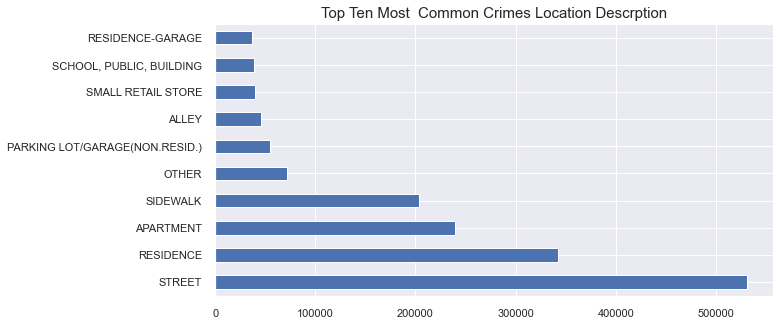

In [33]:
#count of most common types of crime Descrptions
plt.style.use('seaborn')
sns.set(style="darkgrid")
plt.figure(figsize = (10, 5))
plt.title('Top Ten Most  Common Crimes Location Descrption', fontsize = 15)
df['Location Description'].value_counts()[:10].plot(kind='barh', color='b')
plt.show()

Street had the highest amount of crime incidences with a total of 530,430 of all reported location descriptions, which accounted for 26% of the reported crime locations descriptions in Chicago.

In [34]:
#count of blocks  with most crime cases in chicago
(df['Block'].value_counts().head(15))

100XX W OHARE ST                       4090
001XX N STATE ST                       4006
076XX S CICERO AVE                     2998
008XX N MICHIGAN AVE                   2785
0000X N STATE ST                       2412
0000X W TERMINAL ST                    1780
064XX S DR MARTIN LUTHER KING JR DR    1680
063XX S DR MARTIN LUTHER KING JR DR    1635
023XX S STATE ST                       1358
001XX W 87TH ST                        1341
012XX S WABASH AVE                     1297
006XX N MICHIGAN AVE                   1260
008XX N STATE ST                       1251
057XX S CICERO AVE                     1216
009XX W BELMONT AVE                    1175
Name: Block, dtype: int64

In [35]:
#count of blocks with least crime cases in chicago
(df['Block'].value_counts().tail(10))

007XX W 46TH PL           1
003XX N Halsted St        1
124XX S INDIANA AVE       1
007XX E 124TH ST          1
006XX N Clark St          1
004XX W ONTARIO ST ER     1
009XX W VERNON PARK PL    1
041XX N Sheridan Rd       1
023XX S CARPENTER ST      1
010XX E 111th St          1
Name: Block, dtype: int64

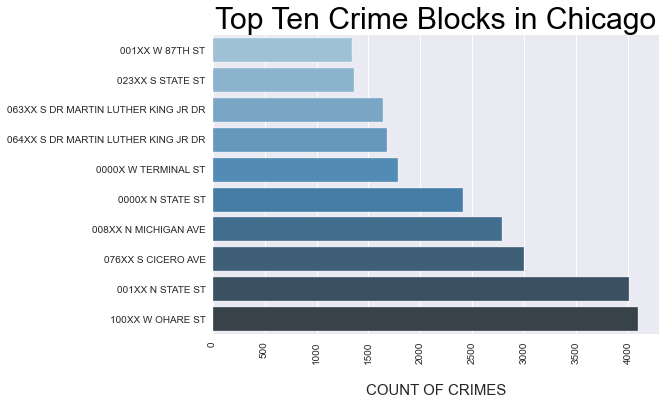

In [36]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_blocks_for_crime = df['Block'].value_counts().sort_values(ascending=False)[:10]

temp = df.groupby('Block', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head(10)
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Block', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top Ten Crime Blocks in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

This chart shows the top ten blocks in chicago with the highest rate of crime, we can see that 100xx W OHARE ST had the highest rate of crime with a total case of 4,090, closely followed by 100xx N STATE ST with a total case of 4006. It can also be seen that, the North, South and the West were the top location amongst the top ten blocks with the highest rate of crimes.

In [37]:
#count of arrest cases 
print (df['Arrest'].value_counts())

False    1527175
True      543406
Name: Arrest, dtype: int64


<Figure size 1080x360 with 0 Axes>

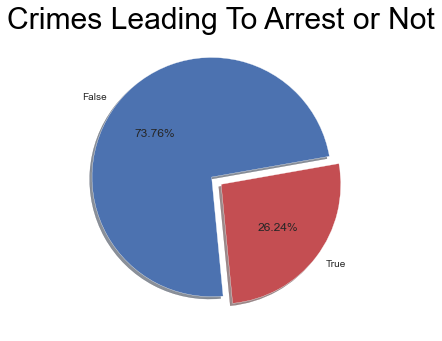

In [38]:
#pie chart showing the percetange of crime cases that lead to arrest or not.
plt.figure(figsize = (15, 5))
color = ['b', 'r']
label = ('False', 'True')
sizes = df['Arrest'].value_counts()
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie (sizes, explode = explode, labels = label, colors = color, autopct='%2.2f%%', shadow = True, startangle=10)
ax1=('equal')
plt.title('Crimes Leading To Arrest or Not',fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.show()

This pie chart shows that 73% of the crimes cases did not lead to an arrest whilst 26% led to an arrest. It will be intresting to futher understand why a high rate of crime does not translate to high rate of arrest, rather there seems to be a very low rate of arrest.

In [39]:
#count of domestic cases 
df['Domestic'].value_counts()

False    1781975
True      288606
Name: Domestic, dtype: int64

<Figure size 1080x360 with 0 Axes>

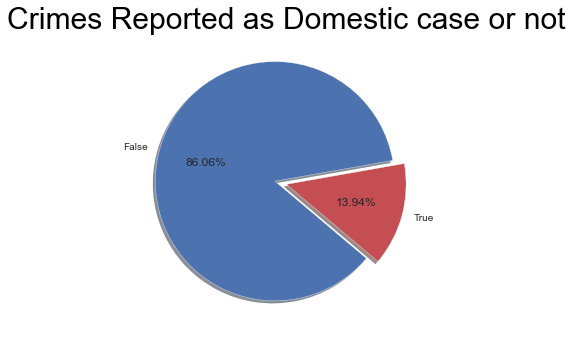

In [40]:
#pie chart showing the percetange of Domestic cases or not.
plt.figure(figsize = (15, 5))
color = ['b', 'r']
label = ('False', 'True')
sizes = df['Domestic'].value_counts()
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie (sizes, explode = explode, labels = label, colors = color, autopct='%2.2f%%', shadow = True, startangle=10)
ax1=('equal')
plt.title('Crimes Reported as Domestic case or not', fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.show()

It can be seen that 86% of the cases were not domestic whilst 14% were. I can safely make the assertion that most of the crimes are not domestic violence related 

In [41]:
#count of crime during the year
df['Year'].value_counts()

2003    141488
2004    140152
2005    134629
2006    133955
2007    130308
2008    125713
2009    116308
2010    110900
2011    105436
2002    103271
2012    100524
2013     91534
2014     82094
2016     80235
2017     79317
2018     79265
2015     77264
2019     77205
2020     62277
2021     60855
2022     36671
2001      1180
Name: Year, dtype: int64

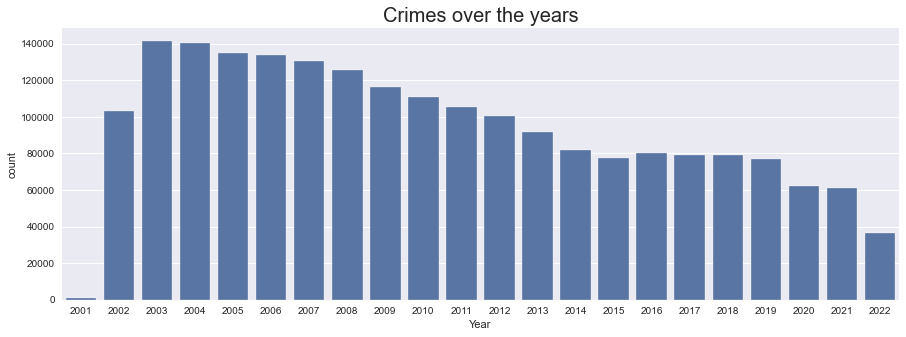

In [42]:
#distribution of crime over the years chart
plt.figure(figsize = (15, 5))
sns.countplot(data = df, x='Year', color = 'b')
plt.title('Crimes over the years', fontsize = 20)
plt.show()

From the chart 2003 and 2004 had the highest cases of crimes with a total of 141,488 and 140,152 respectively
There was a consistent reduction in the rate of crime as years began to increase from 2003. 
The lowest rate of crime was reported in the year 2001 with a total case of 1180.
From 2001 which had the lowest rate of crime and 2003 which had the highest, there was 118% increase in the rate of crime.


In [43]:
#splitting the date feature to get more insights
dfSub = df
tCol = dfSub.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>6:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

dfSub['month'] = monthList
dfSub['week'] = dayList
dfSub['day']= periodList
dfSub.head()

2070581 2070581 2070581


C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1485210365.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSub['month'] = monthList
C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1485210365.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSub['week'] = dayList
C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1485210365.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,week,day
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",Jul,Sat,Afternoon
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",Jul,Tue,Morning
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",Apr,Fri,Morning
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",Jul,Mon,Morning
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",Jul,Sun,Morning


In [44]:
#count of crime during each month
df['month'].value_counts()

Jul    198320
Aug    191098
May    190591
Jun    190568
Oct    180506
Sep    179078
Apr    166273
Mar    164240
Nov    162565
Jan    155411
Dec    154559
Feb    137372
Name: month, dtype: int64

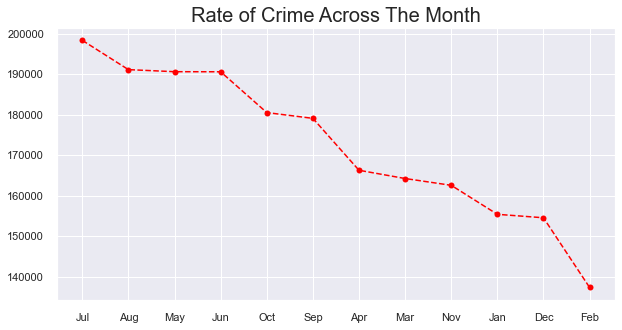

In [45]:
#rate of crime during across the month
sns.set(style="darkgrid")
plt.figure(figsize = (10, 5))
plt.title('Rate of Crime Across The Month', fontsize = 20)
plt.plot(df['month'].value_counts(), color = 'red',linestyle='--', marker='o')
plt.show()

July had the highest rate of crime with a total case of 198,320 whilst Feburary had the lowest with 137,372 cases.
We can safely make the assertion that the summer tends to have the highest rate of crime cases as it can be seen in the months of Jun, Jul, Aug,Sep, which accounted for 37% of the crimes. It is also quite obvious that the rate of crime during the warmer periods are usully at its peak compared to the cool season.

In [46]:
#count of crime during the week
df['week'].value_counts()

Fri     311383
Wed     297801
Sat     296893
Tue     295674
Thu     294212
Mon     292254
Sun     282364
Name: week, dtype: int64

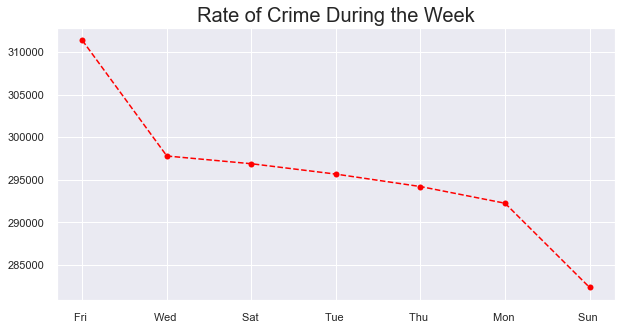

In [47]:
# graph showing rate of crime during the week
sns.set(style="darkgrid")
plt.figure(figsize = (10, 5))
plt.title('Rate of Crime During the Week', fontsize = 20)
plt.plot(df['week'].value_counts(), color = 'red',linestyle='--', marker='o')
plt.show()

Friday had the highest amount of crime cases with 311,383, this day accounted for 15% of the crimes.

In [48]:
#count of crimes during the day
df['day'].value_counts()

Morning      763321
Night        668835
Afternoon    313855
Evening      211358
Unknown      113212
Name: day, dtype: int64

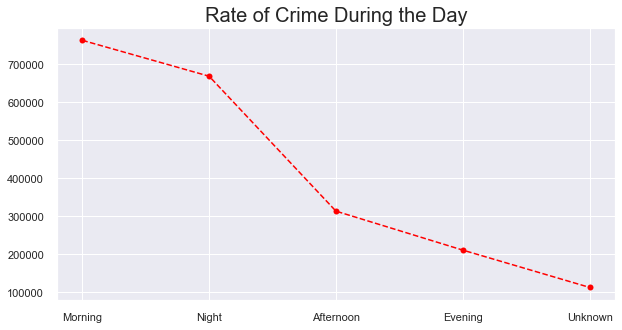

In [49]:
#graph showing the rate of crime during the day.
sns.set(style="darkgrid")
plt.figure(figsize = (10, 5))
plt.title('Rate of Crime During the Day', fontsize = 20)
plt.plot(df['day'].value_counts(), color = 'red',linestyle='--', marker='o')
plt.show()

The chart shows that majority of the crimes tend to happen in the morning with a total case of 763,321 closely followed by night with a total case of 668,835. This collectively resulted in 69% crime rate during this period

<AxesSubplot:>

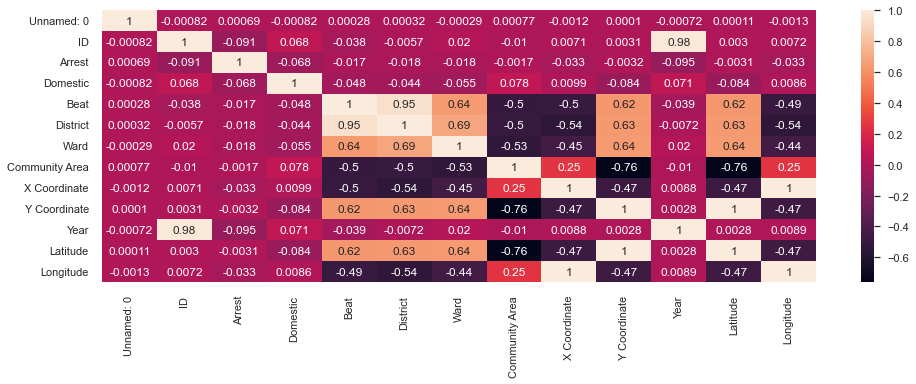

In [50]:
#checking the correlation between the numeric features
set_option ('display.width', 1000)
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True) 


# BIVARIATE ANALYSIS

In [51]:
#CREATING A COPY OF THE DATA
crime_types = df.copy()

In [52]:
#CREATING A LIST OF THE TOP TEN CRIMES
ten_crime_types = ['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','ASSAULT', 'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT','DECEPTIVE PRACTICE','ROBBERY'] 

In [53]:
#GETTING THE TOP TEN CRIMES FROM THE DATA
crime_types = crime_types[crime_types['Primary Type'].isin(ten_crime_types)]

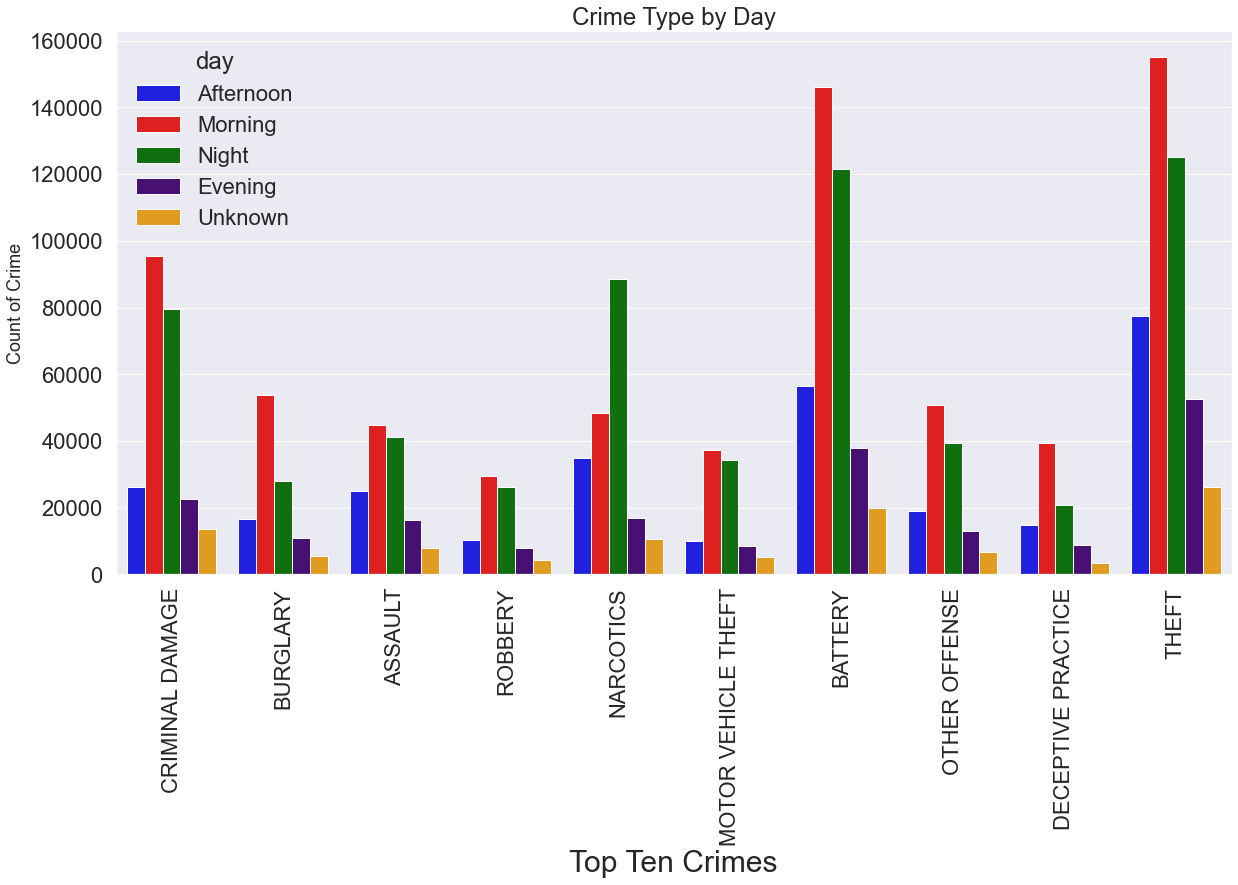

In [54]:
#CREATING THE VISUALS FOR THE TOP TEN CRIMES BY DAY
plt.figure(figsize = (20,10))
sns.set_theme(font_scale = 2)
sns.countplot(x = 'Primary Type', hue = 'day', data = crime_types, palette=['Blue', 'Red', 'Green', 'indigo', 'Orange'])
plt.xlabel('Top Ten Crimes', fontsize=30)
plt.ylabel('Count of Crime',fontsize=18)
plt.title('Crime Type by Day')
plt.xticks(rotation=90)
plt.show()

The chart shows that the top ten crimes tend to take place in the morning and at night. It also shows that there is also a very high tendency for THEFT to take place in the afternoon and also BATTERY

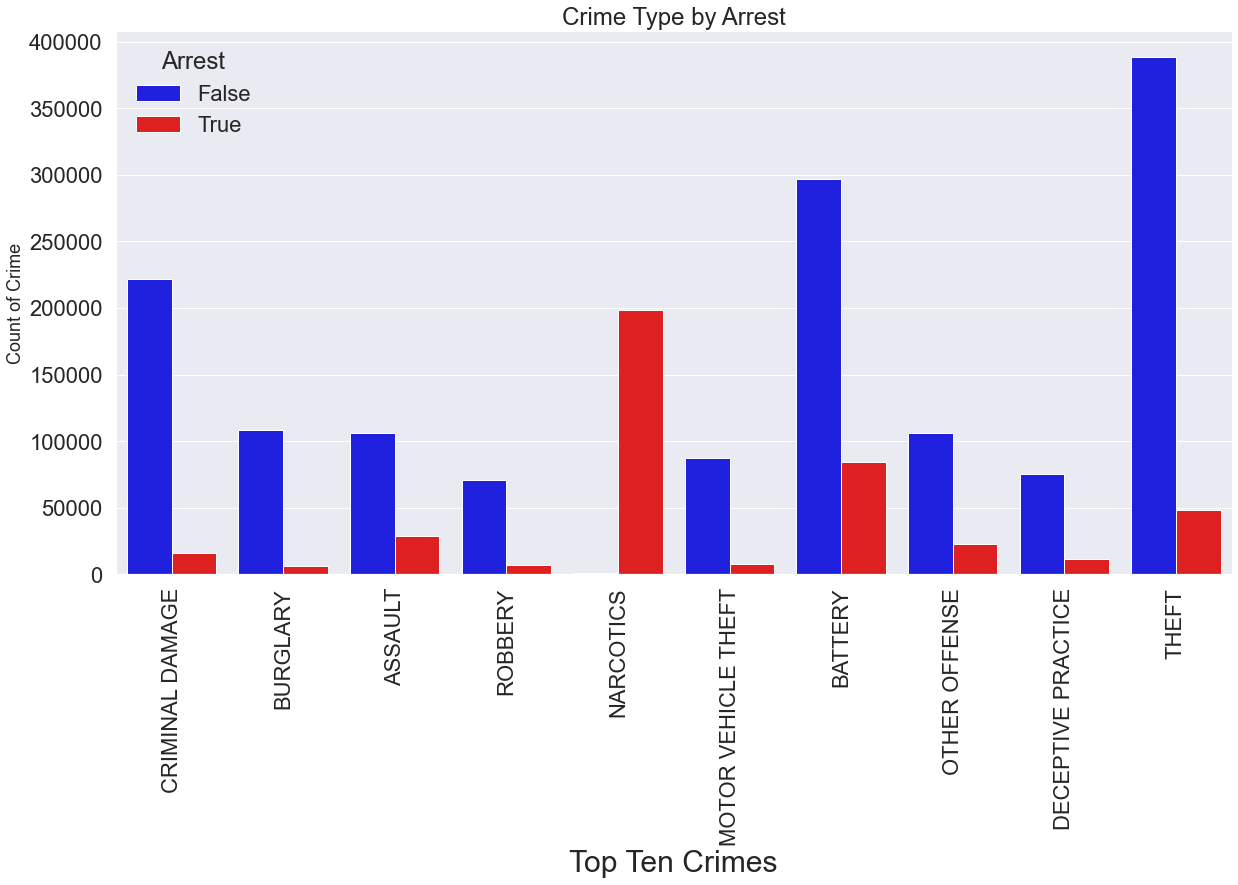

In [55]:
#CREATING THE VISUALS FOR THE TOP TEN CRIMES BY ARREST
plt.figure(figsize = (20,10))
sns.set_theme(font_scale = 2)
sns.countplot(x = 'Primary Type', hue = 'Arrest', data = crime_types, palette=['Blue', 'Red'])
plt.xlabel('Top Ten Crimes', fontsize=30)
plt.ylabel('Count of Crime',fontsize=18)
plt.title('Crime Type by Arrest')
plt.xticks(rotation=90)
plt.show()

The chart shows that the ratio to arrest based on the top ten crimes is quite low. Amongst the Top ten cases Narcotics was the crime with the highest rate of arrest

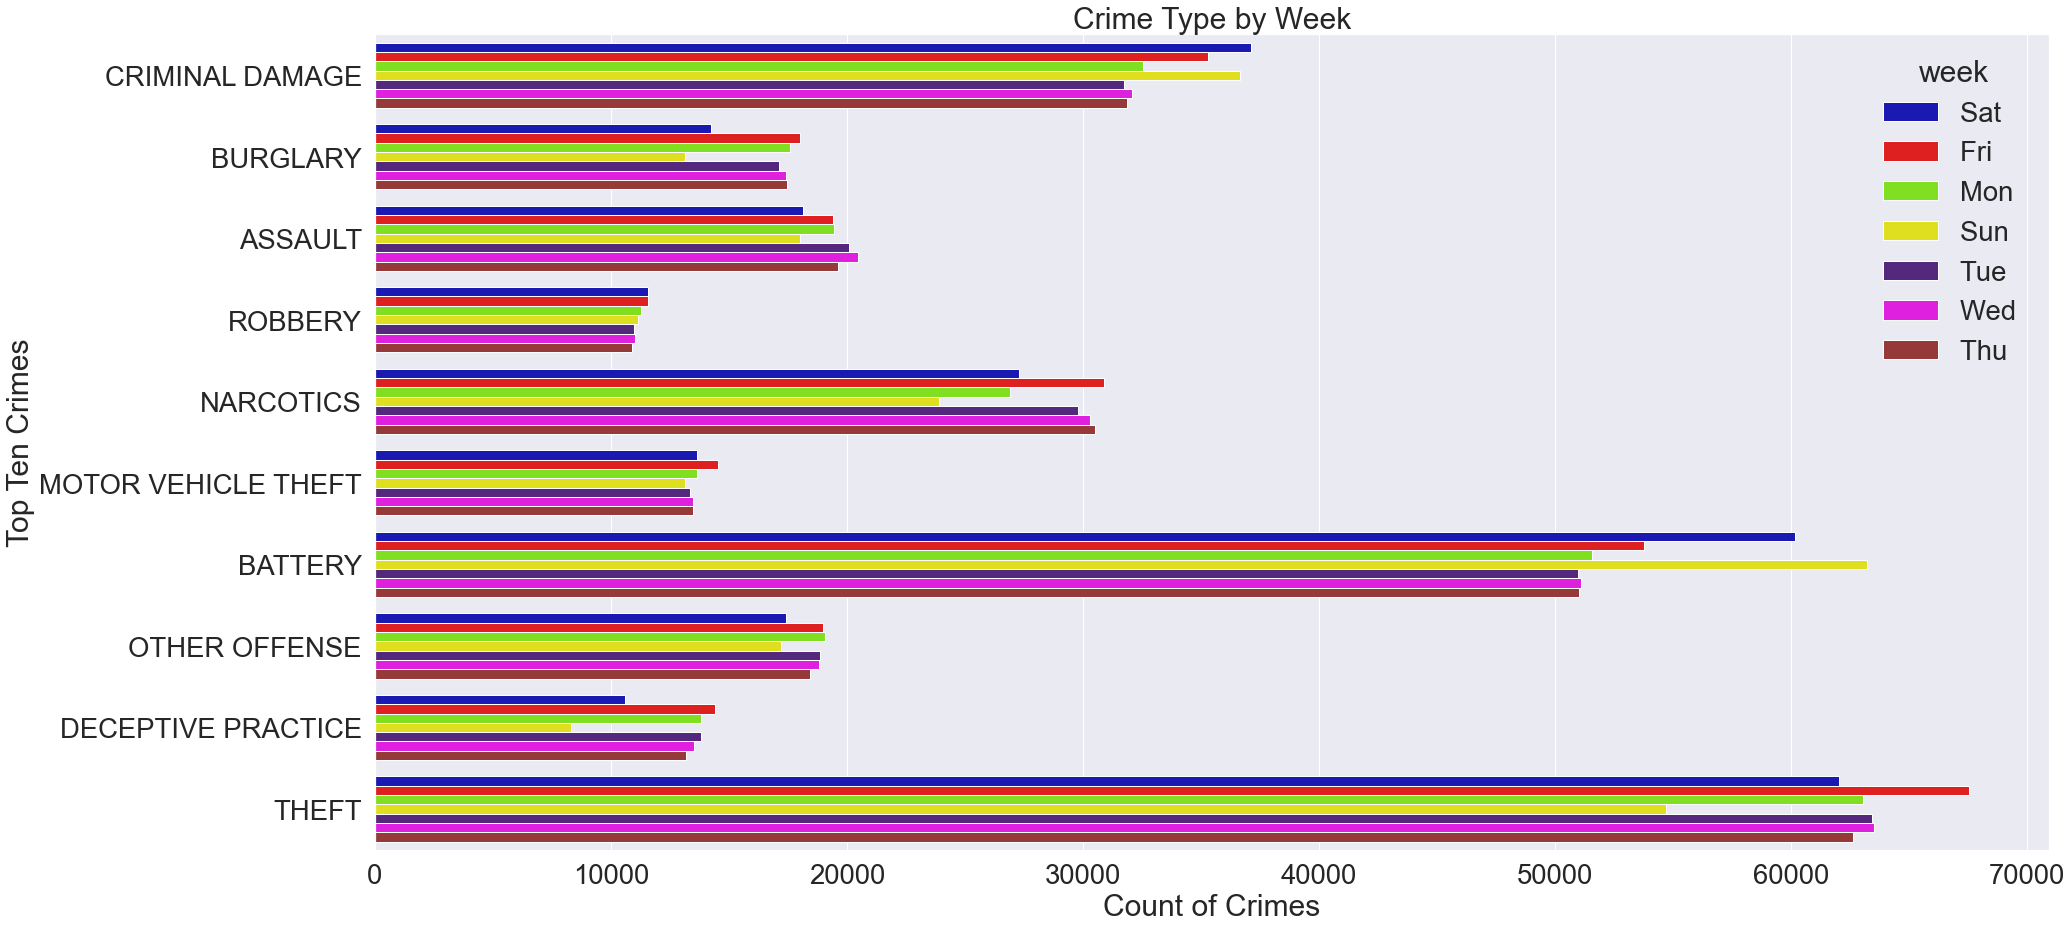

In [56]:
#CREATING THE VISUALS FOR THE TOP TEN CRIMES BY WEEK
plt.figure(figsize = (30,15))
sns.set_theme(font_scale = 2.5)
sns.countplot(y = 'Primary Type', hue = 'week', data = crime_types, palette=['#0000CD', 'Red', '#7FFF00', '#FFFF00', '#551A8B', 'magenta','Brown'])
plt.xlabel('Count of Crimes', fontsize=30)
plt.ylabel('Top Ten Crimes',fontsize=30)
plt.title('Crime Type by Week')
#plt.xticks(rotation=90)
plt.show()

From the chart,the week does not have a significant impact on the type of crime, there seems to be almost equal occurence of
crime based on the week. For the two most frequesnt crimes in chicago which are Battery and Theft, there seems to be more cases of Battery on sundays and saturday(weekends), For Theft there is a high frequency of it occruing on Friday.

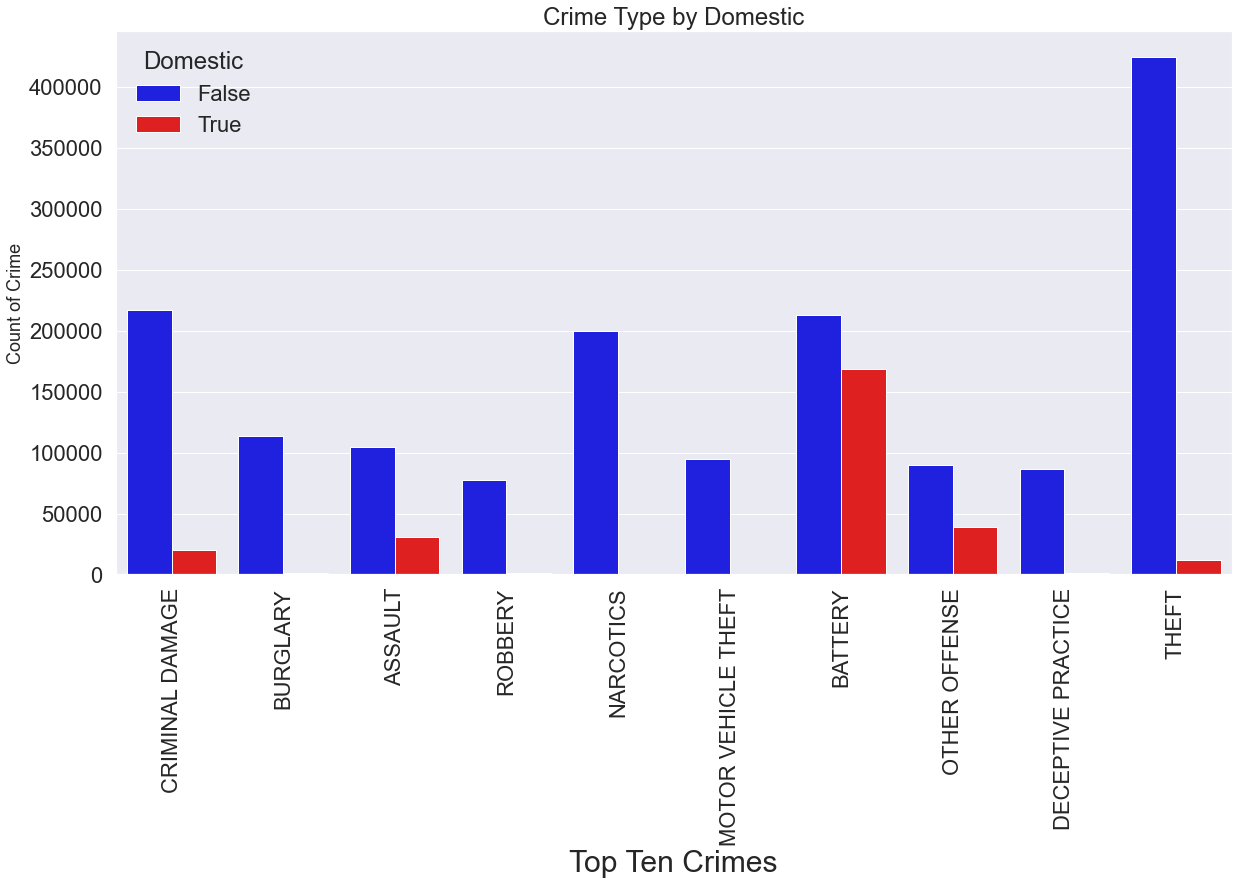

In [57]:
#CREATING THE VISUALS FOR THE TOP TEN CRIMES BY DOMESTIC RELATED
plt.figure(figsize = (20,10))
sns.set_theme(font_scale = 2)
sns.countplot(x = 'Primary Type', hue = 'Domestic', data = crime_types, palette=['Blue', 'Red'])
plt.xlabel('Top Ten Crimes', fontsize=30)
plt.ylabel('Count of Crime',fontsize=18)
plt.title('Crime Type by Domestic')
plt.xticks(rotation=90)
plt.show()

Most of the crimes were not Domestic, Battery was the crime that had the most Domestic cases. Somce of the crimes such as Criminal Damage, Assault, Theft and Other Offenses had a few cases that were Domestic

In [58]:
#CREATING A COPY OF THE DATA
crime_location = df.copy()

In [59]:
#CREATING A LIST OF THE TOP TEN CRIME LOCATION
top_ten_crime_loc = ['STREET','RESIDENCE','APARTMENT','SIDEWALK','OTHER','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','SMALL RETAIL STORE','SCHOOL, PUBLIC, BUILDING','RESIDENCE-GARAGE'] 

In [60]:
#GETTING THE TOP TEN CRIME LOCATION FROM THE DATA
crime_location = crime_location[crime_location['Location Description'].isin(top_ten_crime_loc)]

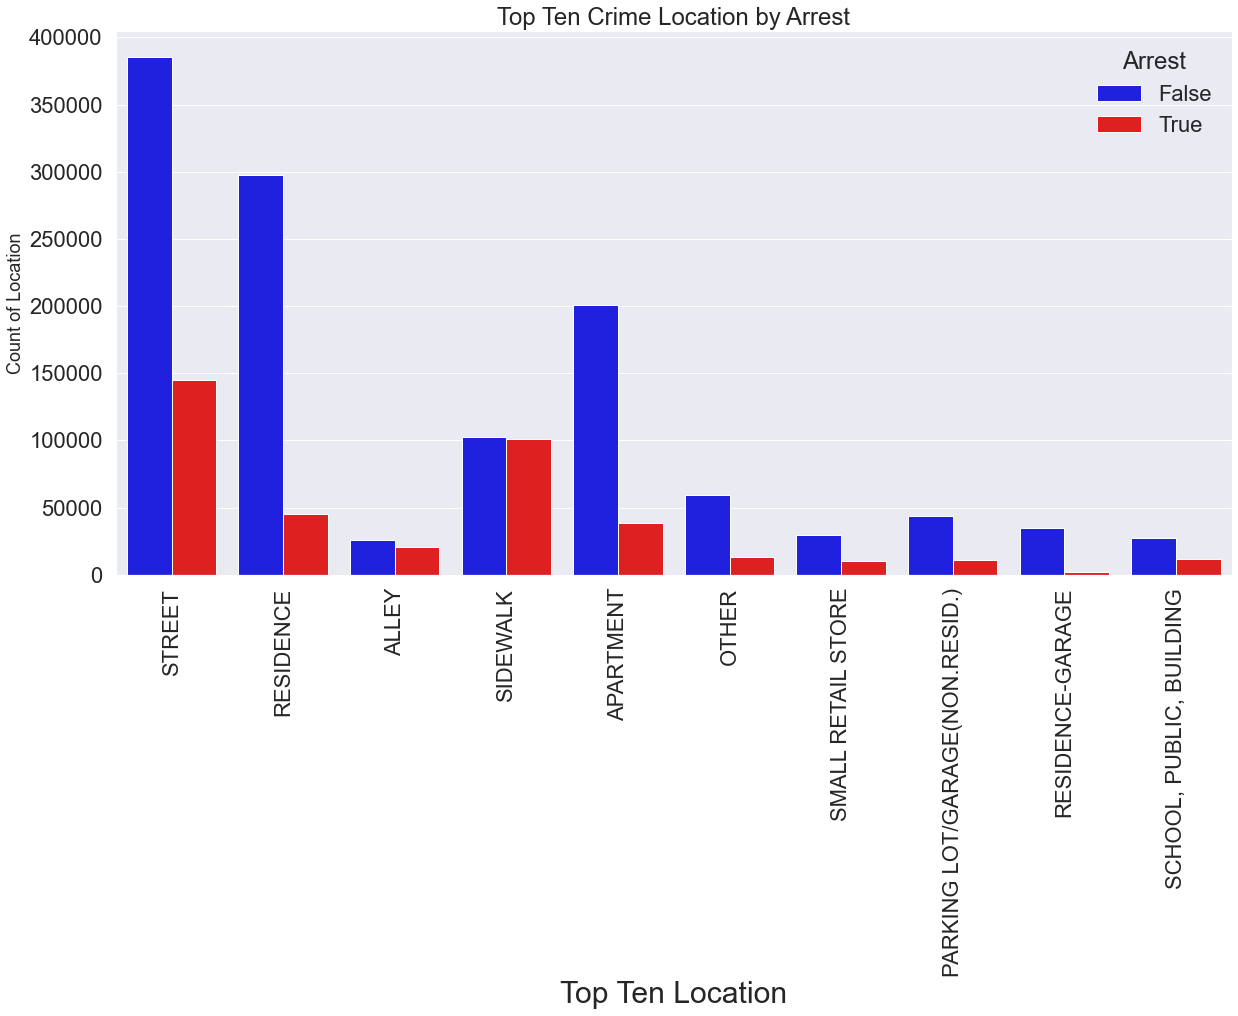

In [61]:
#CREATING THE VISUALS FOR THE TOP TEN CRIME LOCATIONS BY ARREST
plt.figure(figsize = (20,10))
sns.set_theme(font_scale = 2)
sns.countplot(x = 'Location Description', hue = 'Arrest', data = crime_location, palette=['Blue', 'Red'])
plt.xlabel('Top Ten Location', fontsize=30)
plt.ylabel('Count of Location',fontsize=18)
plt.title('Top Ten Crime Location by Arrest')
plt.xticks(rotation=90)
plt.show()

This chart clearly shows that most arrest tend to happen on the street which also correlate with the fact that the street had the highest rate of reported crime cases.
The Sidewalk was also the second highest location in terms of arrest.
Arrests were also recorded in places such as Resisdence, Alley and Apartment . This further buttresses the point that these places are hotspots for crime

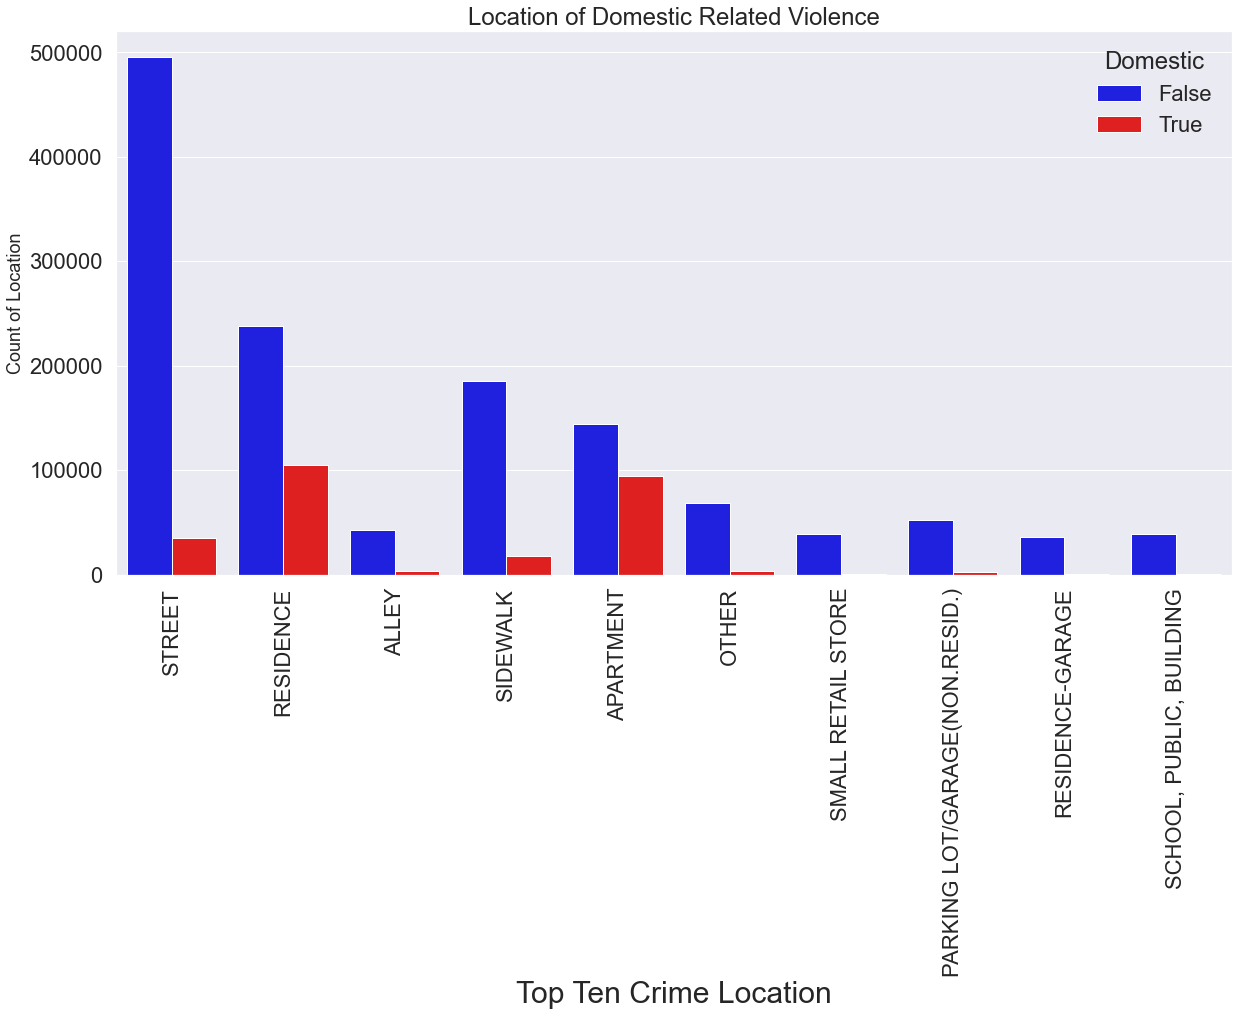

In [62]:
#CREATING THE VISUALS FOR THE TOP TEN CRIME LOCATIONS BY DOMESTIC
plt.figure(figsize = (20,10))
sns.set_theme(font_scale = 2)
sns.countplot(x = 'Location Description', hue = 'Domestic', data = crime_location, palette=['Blue', 'Red'])
plt.xlabel('Top Ten Crime Location', fontsize=30)
plt.ylabel('Count of Location',fontsize=18)
plt.title('Location of Domestic Related Violence')
plt.xticks(rotation=90)
plt.show()

Residence and Apartment were the two Locations where domestic related violence tend to occur the most

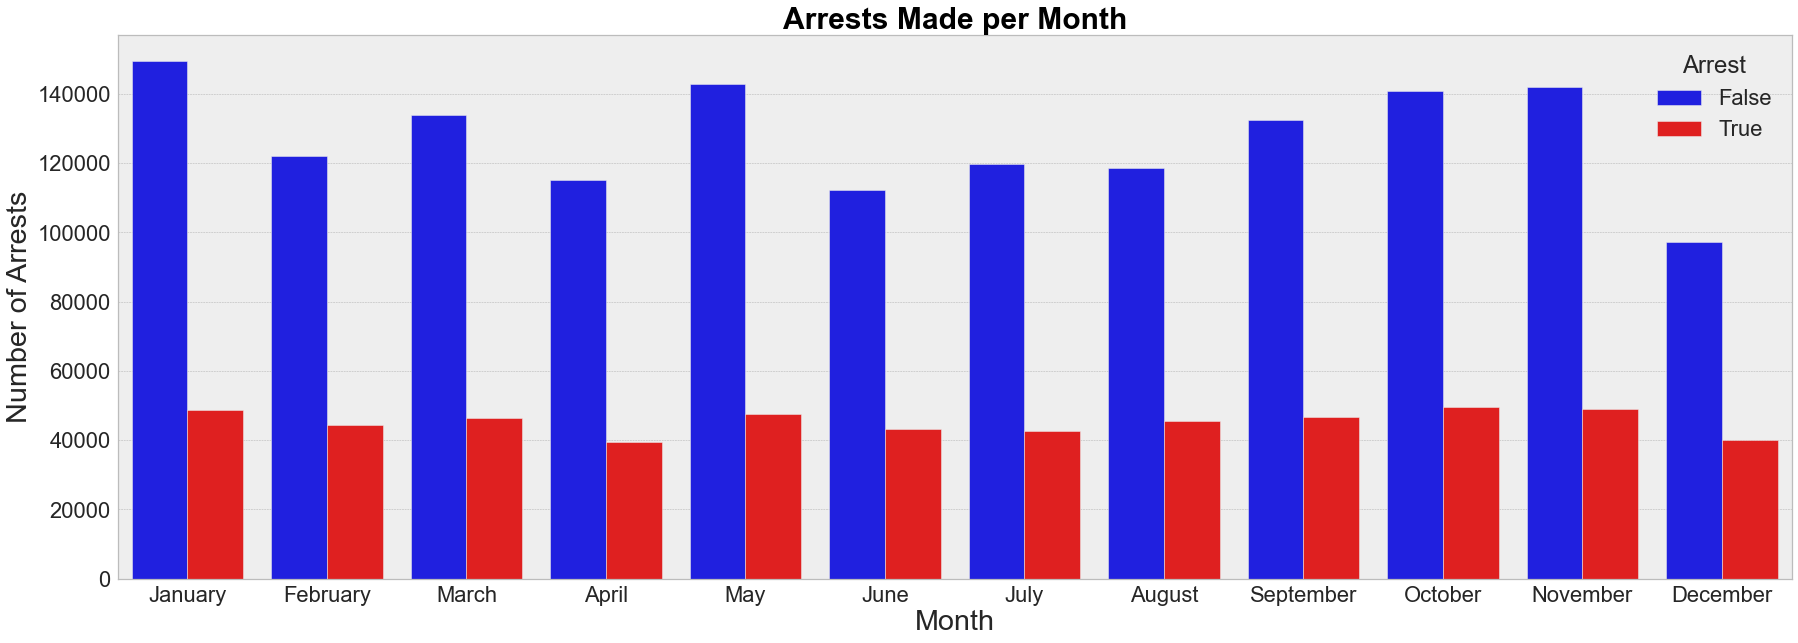

In [63]:
#checking the rate of arrest accros each month
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.countplot(x="month",
                   hue='Arrest',
                   data=df[['month','Arrest']],
                   palette=['Blue', 'Red'])
months = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    

ax.set(title='Arrests Made per Month', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month', fontdict={'fontsize': 30, 'color': 'black'}, weight="bold")
plt.show()

From the chart we can see that arrest were made accros each month with no month outrightly outperfroming any in terms of arrest.

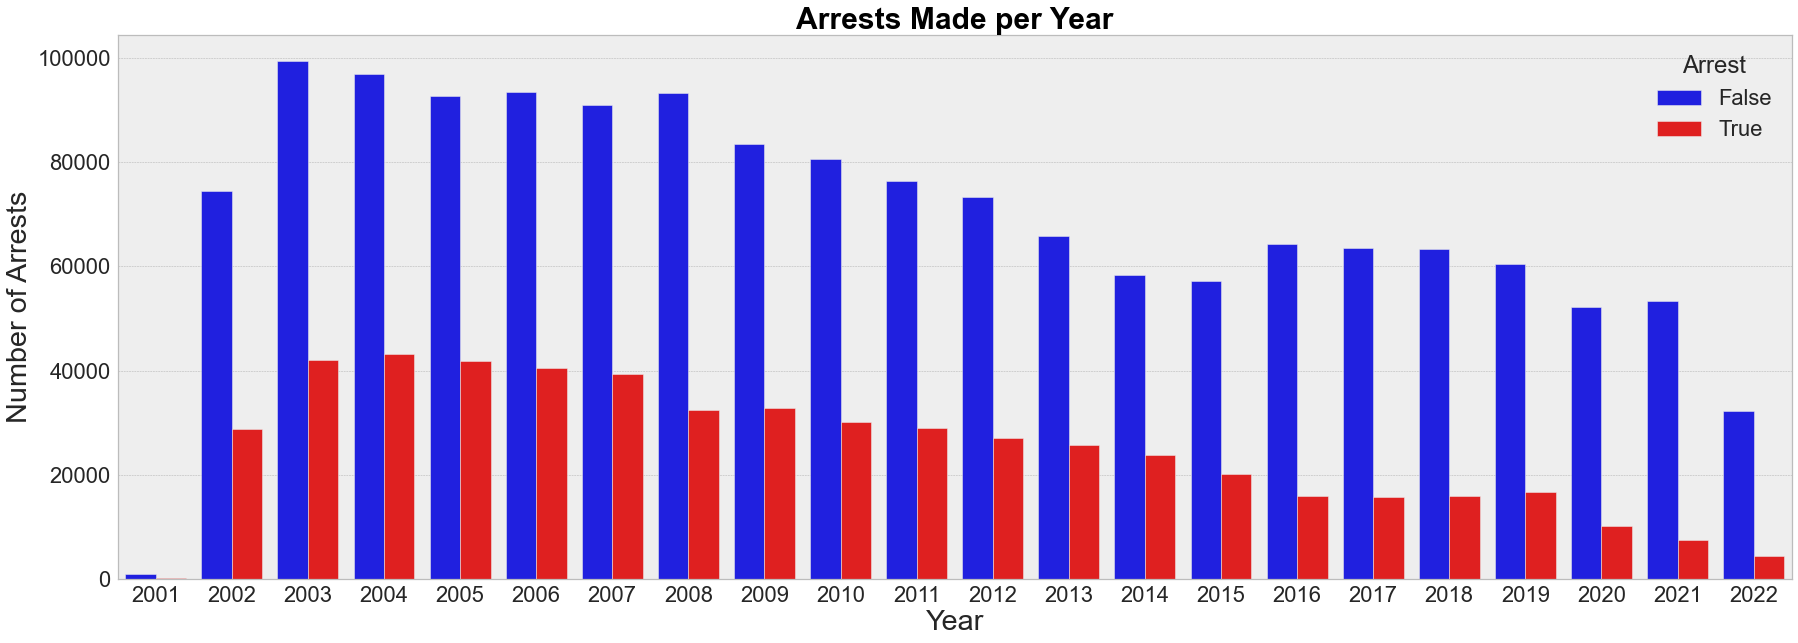

In [64]:
#checking the rate of arrest across each year
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.countplot(x="Year",
                   hue='Arrest',
                   data=df[['Year','Arrest']],
                   palette=['Blue', 'Red'])
Year = ['2001','2002','2003','2004','2005','2006','2007',\
             '2008','2009','2010','2011','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020','2021','2022']    

ax.set(title='Arrests Made per Year', xlabel='Year', ylabel='Number of Arrests', xticklabels=Year)
plt.title('Arrests Made per Year', fontdict={'fontsize': 30, 'color': 'black'}, weight="bold")
plt.show()

2003, 2004, 2005, 2006, 2007, were the years where the most arrest were made. From our analysis of the rate of crime by year we know that as the year increased the rate of crime began to reducce This also has an effect on the rate of arrest, as the year increase the rate of arrest reduced.

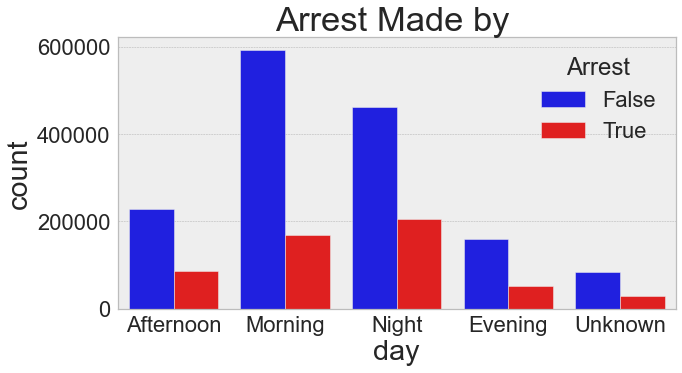

In [65]:
#arrest made during the day
plt.figure(figsize = (10,5))
sns.countplot(x = 'day', hue = 'Arrest', data = df, palette=['Blue', 'Red'])
plt.title('Arrest Made by ')
plt.show()

From the chart we can see that we tend to have more arrest in the Morning and at Night, this definitely correlate with the fact that these are the periods when most crimes tend to take place.

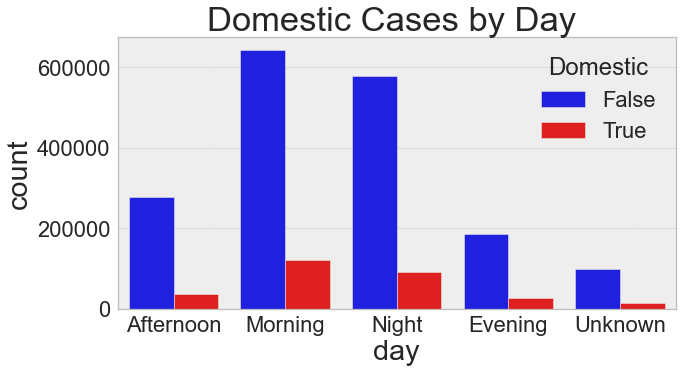

In [66]:
#domestic violence made during the day
plt.figure(figsize = (10,5))
sns.countplot(x = 'day', hue = 'Domestic', data = df, palette=['Blue', 'Red'])
plt.title('Domestic Cases by Day ')
plt.show()

There are more cases of Domestic violence in the Moring and there were also cases at Night

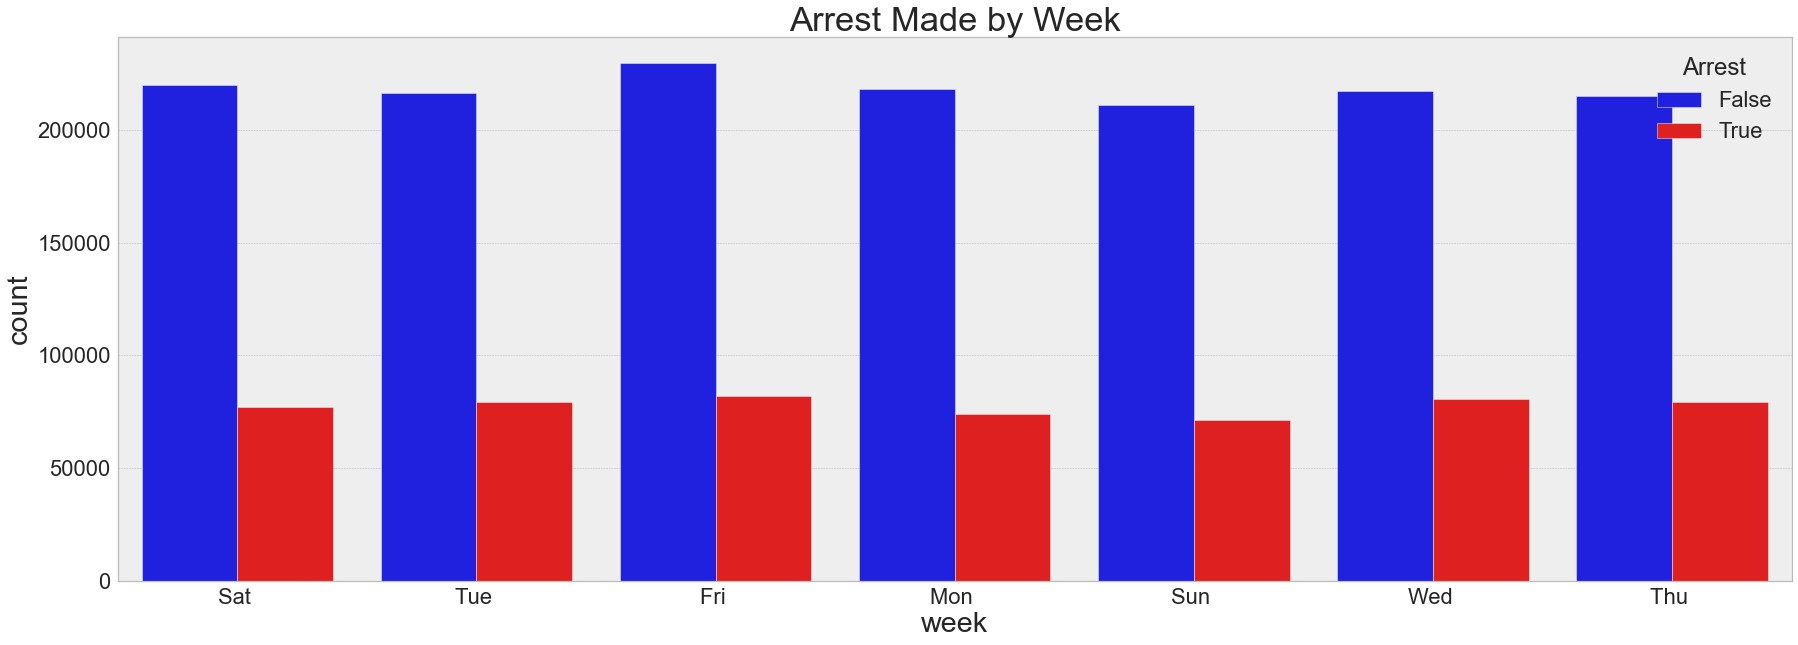

In [67]:
#arrest made during the week
plt.figure(figsize = (30,10))
sns.countplot(x = 'week', hue = 'Arrest', data = df, palette=['Blue', 'Red'])
plt.title('Arrest Made by Week')
plt.show()

In terms of arrest during the week, there were no significant difference as there were arrest made with almost equal rate across each day of the week

SUMMARY OF FINDINGS 
I started out by carrying out a univariate analysis to tease out important concepts from each individual
feature from the data set, then I went ahead to carry out a bivariate analysis that is, getting insight
by pairing key features together. Based on that I was able come up with the following findings.
*We now know the Top ten crimes in chicago
*The top ten crime Locations 
*The top types crime description
*The blocks where these crimes tend to occur
*The day, week, month and year patterns of these crimes
*The percentage of Arrest 
*The percentage of crime based on deomestic violence.
*Arrest made based on top ten crimes
*Arrest Made based on Location
*Arrest made during the day, week, month and year
*Domestic violence based on location
*Domestic related violence based on top ten crimes
Domestic violence during the day.

Conclusion

Based on the analysis carried out, it was discovered that 75% of the crimes committed did not lead to an arrest, I can safely make the recommendation that, if more arrest can be made, it can further help reduced the spate of violent crimes in the state of Chicago. 
There is also a clear understanding of the most frequent types of crimes and the fact that these crimes tend to happen in the North, West and South streets in Chicago, we can deploy a robust network that can look into checkmating the activities that goes on around these places.
Most crimes tend to happen in the summer and fall season as well as in the morning and at night, I can further recommend that patrols can increase during these periods.

